# ЛР1. - Модель полиномиальной регрессии.

Создать обучающую выборку, воспользовавшись полиномом 6 степени или функцию

$$y(x)= θ_1 x+θ_2  sin⁡(x)+ θ_3$$ 

с добавлением шума с нормальным распределением.

Построить модель полиномиальной регрессии, аппроксимирующей данные обучающей выборки. Исходить из того, что степень полинома (начальный закон генерации обучающей выборки) неизвестен. 

Обучение проводить методом наименьших квадратов.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.random.rand(100)*10-5

In [21]:
y = 3*x**6 - 7*x**5 + 2*x**4 + 9*x**3 - 5*x**2 + 8*x + 1

In [22]:
#  Добавляет случайный шум к данным
# y = y + np.random.randn(100)*10

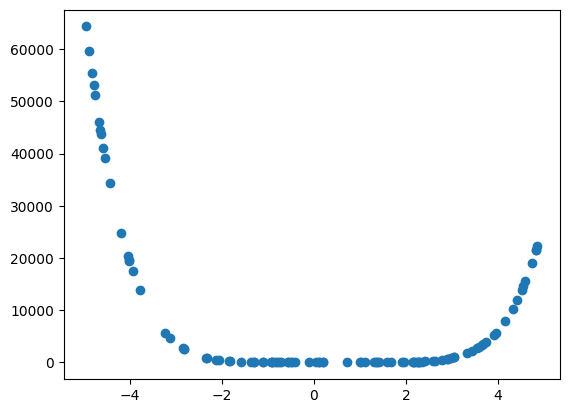

In [23]:
plt.scatter(x,y)
plt.show()

In [24]:
degrees = np.arange(1, 11) # определяем диапазон степеней полинома, который мы хотим проверить
n = len(y)

aic_scores = []
for degree in degrees:
    # создаем модель полиномиальной регрессии заданной степени
    p = np.polyfit(x, y, degree) # МНК
    y_hat = np.polyval(p, x)

    # вычисляем значение AIC для данной модели
    rss = np.sum((y - y_hat) ** 2) # residual sum of squares
    aic = n * np.log10(rss / n) + 2 * (degree + 1) # вычисляем значение AIC

    aic_scores.append(aic)

# находим лучшую степень полинома по критерию AIC
best_degree = degrees[np.argmin(aic_scores)]

print("Лучшая степень полинома: ", best_degree)


Лучшая степень полинома:  6


In [25]:
#polynomial fit 
model = np.poly1d(np.polyfit(x, y, best_degree))

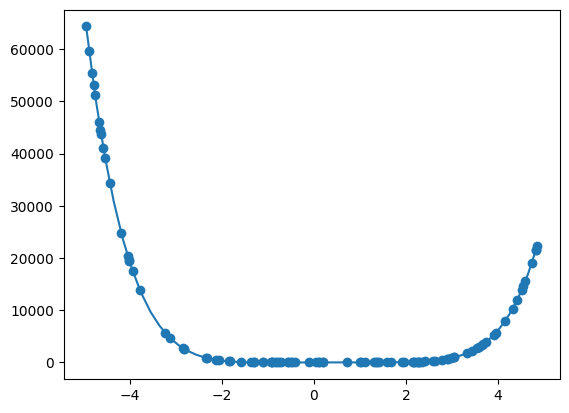

In [26]:
polyline = np.linspace(np.min(x), np.max(x), 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

In [27]:
print(model)

   6     5     4     3     2
3 x - 7 x + 2 x + 9 x - 5 x + 8 x + 1
